In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('diamonds.csv')

# Display the first few rows to understand the data structure
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# One-hot encode the categorical variables 'color' and 'clarity'
df_encoded = pd.get_dummies(df, columns=['color', 'clarity'], drop_first=True)

# Convert 'cut' into a binary classification problem (e.g., 'Ideal' vs 'Not Ideal')
df_encoded['cut_binary'] = df_encoded['cut'].apply(lambda x: 1 if x == 'Ideal' else 0)


In [4]:
# Select relevant features and target variable
X = df_encoded.drop(['cut', 'cut_binary'], axis=1)
y = df_encoded['cut_binary']

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)


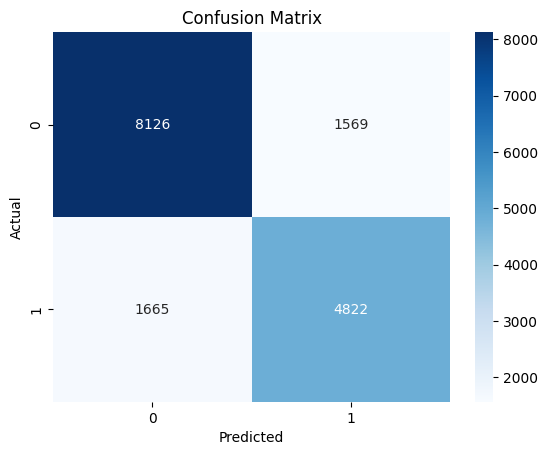

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      9695
           1       0.75      0.74      0.75      6487

    accuracy                           0.80     16182
   macro avg       0.79      0.79      0.79     16182
weighted avg       0.80      0.80      0.80     16182



In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Area Under the ROC Curve (AUC): 0.88


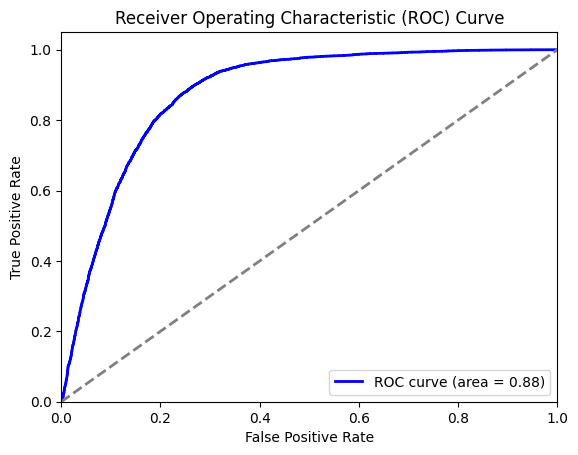

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the probability scores
y_prob = model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Area Under the ROC Curve (AUC): {roc_auc:.2f}")

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


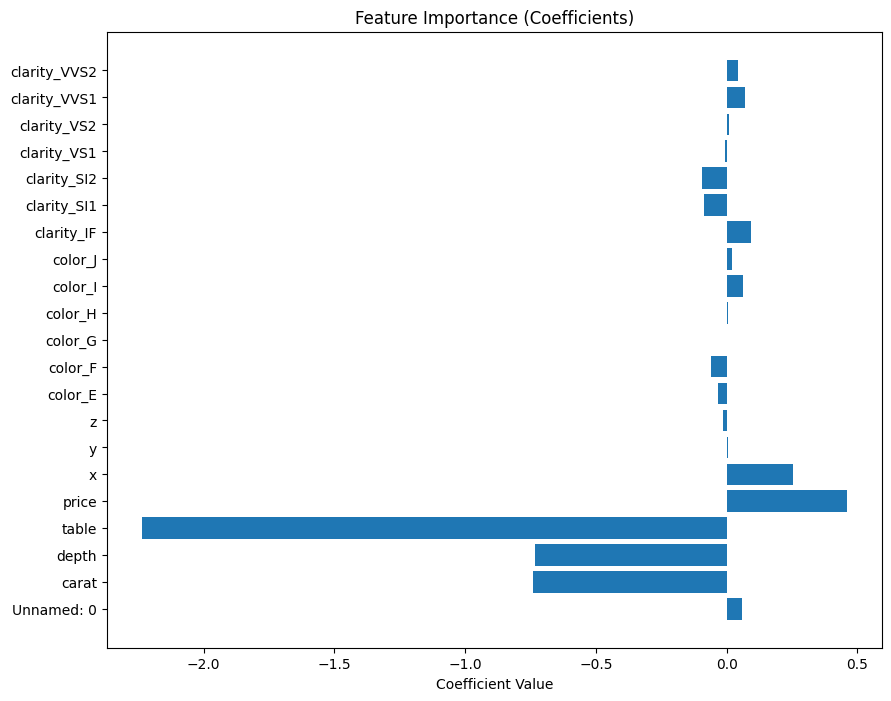

In [ ]:
import numpy as np

# Plotting coefficients
coefficients = model.coef_[0]
feature_names = X.columns

plt.figure(figsize=(10, 8))
plt.barh(feature_names, coefficients)
plt.title('Feature Importance (Coefficients)')
plt.xlabel('Coefficient Value')
plt.show()


Classification report

`
Here’s a brief explanation of each metric:

Precision: Measures how many of the predicted positive instances are actually positive.

Class 0: 83% of predicted class 0 instances are correct.
Class 1: 75% of predicted class 1 instances are correct.
Recall: Measures how many of the actual positive instances are correctly identified by the model.

Class 0: 84% of actual class 0 instances are identified.
Class 1: 74% of actual class 1 instances are identified.
F1-Score: The harmonic mean of precision and recall, providing a balance between the two.

Class 0: 0.83 (balance of precision and recall for class 0).
Class 1: 0.75 (balance of precision and recall for class 1).
Support: The number of actual instances for each class.

Class 0: 9,695 instances.
Class 1: 6,487 instances.
Accuracy: The overall correctness of the model, which is 80%.

`